# Laboratorium 6 Rozwiązywanie układów równań liniowych
### Autor: Krzysztof Hardek

In [197]:
import numpy as np
import scipy.linalg
import scipy
import copy
import time
import csv
import networkx as nx
import matplotlib.pyplot as plt

## Zad1 Metoda Gaussa-Jordana

Własna implementacja funkcji

In [198]:
def argmax(a, x_min, x_max, k):
    max_val = np.NINF
    max_val_idx = -1
    
    for i in range(x_min, x_max+1):
        if abs(a[i][k]) > max_val:
            max_val = abs(a[i][k])
            max_val_idx = i
        
    return max_val_idx


def merge_into_extended(a, b):
    m = len(a)
    n = len(a[0])
    
    extended = np.zeros((m, n+1))
    
    for i in range(m):
        extended[i][n] = b[i]
        
        for j in range(n):
            extended[i][j] = a[i][j]
            
    return extended

    
def read_solution(triangular_matrix):
    m = len(triangular_matrix)
    n = len(triangular_matrix[0]) 
    
    x = np.zeros(m)
    
    for i in range(m):
        x[i] = triangular_matrix[i][n-1] / triangular_matrix[i][i]
    
    return x


def gauss(a, b):
    a = merge_into_extended(a, b)
    
    h = 0
    k = 0
    m = len(a)
    n = len(a[0])

    i_max = 0
    while h < m and k < n:
        i_max = argmax(a, h, m-1, k)
        
        if a[i_max][k] == 0:
            k += 1
            
        else:
            a[[i_max, h]] = a[[h, i_max]]
            
            for i in range(m): # im making triangular matrix
                if i == h:
                    continue
                    
                f = a[i][k] / a[h][k]
                a[i][k] = 0
                
                for j in range(k+1, n):
                    a[i][j] = (a[i][j] - a[h][j] * f)
                  
            h += 1
            k += 1
    return read_solution(a)

#### Porównanie wydajności zaimplementowanej funkcji oraz jej odpowiednika w numpy

Czas rozwiązania

In [199]:
a = np.random.rand(600, 600)
b = np.random.rand(600)

ts_1 = time.time()
x_my = gauss(a, b)
ts_2 = time.time() 
x_lib = np.linalg.solve(a, b)
ts_3 = time.time()

print(f'numpy: {ts_3 - ts_2}, implementacja własna: {ts_2 - ts_1}')

a = np.random.rand(501, 501)
b = np.random.rand(501)

ts_4 = time.time()
x_my = gauss(a, b)
ts_5 = time.time() 
x_lib = np.linalg.solve(a, b)
ts_6 = time.time()


print(f'numpy: {ts_6 - ts_5}, implementacja własna: {ts_5 - ts_4}')

numpy: 0.008668661117553711, implementacja własna: 114.05030822753906
numpy: 0.003905773162841797, implementacja własna: 68.17498970031738


Wartości rozwiązania

In [201]:
for i in range(600):
    print(f'{x_my[i]}  {x_lib[i]}')


-2.5826651977665778  -2.5826651977677972
-7.512687301978734  -7.51268730198186
-6.912182694128278  -6.912182694130533
4.819051017381014  4.819051017382874
17.780645084728093  17.780645084733905
4.337419991098269  4.337419991100262
1.8664181518986873  1.8664181518996728
3.066249999880652  3.0662499998815673
0.038302898017300115  0.03830289801772327
-1.2706719661379295  -1.27067196613813
-5.4114430716856  -5.411443071687613
8.636658212492975  8.636658212495542
-1.1608012816163207  -1.16080128161698
-9.59562470671091  -9.595624706714542
-8.71287928096076  -8.712879280964271
-0.9113764717401119  -0.9113764717412166
0.740117693286555  0.7401176932870854
7.192426636888683  7.192426636890814
-0.5870945180314633  -0.5870945180314706
-8.53143299842718  -8.531432998430498
2.9383315047556278  2.938331504756916
-5.539626164251293  -5.539626164253752
-4.5450367671021965  -4.545036767102962
2.5127464182551797  2.512746418255773
-9.5373052858714  -9.537305285874973
-9.701970831771275  -9.701970831774

IndexError: index 501 is out of bounds for axis 0 with size 501

### Wnioski

Czas wykonia zaimplementowanej przeze mnie funkcji jest dużo większy (kilka rzędów wielkości). Może to wynikać z pewnych ulepszeń stosowanych przy rozwiązywaniu metodą eliminacji gaussa, takich jak wyznaczanie rozkładu LU, rozkład Cholesky'ego lub wykorzystania zupełnie innego podejścia polegającego na iteracyjnym przybliżaniu rozwiązania. Jeśli chodzi o rozwiązanie układu równań to jest ono prawie takie samo dla obu funkcji. Różnice pojawiają się kilkunastym miejscu po przecinku. Wynikać to może z innej kolejności wykonywania pewnych równoważnych operacji (tak jak było to pokazane laboratorium pierwszym) albo z wykorzystania metody aproksymacyjnej.

## Zad2 Faktoryzacja LU

In [202]:
def lu(a): 
    n = len(a)
    l = np.zeros((n, n))
    u = np.zeros((n, n))
   

    for i in range(n):
        u_row_max = 0
        u_row_max_idx = -1
        for k in range(i, n):
            sum = 0
            
            for j in range(i):
                sum+= l[i][j] * u[j][k]
                
            u[i][k] = a[i][k] - sum
            
            if abs(u[i][k]) >= u_row_max:
                u_row_max = u[i][k]
                u_row_max_idx = k
        
        u[:,[i, u_row_max_idx]] = u[:,[u_row_max_idx, i]] # col swapping
        
        for k in range(i, n):
            if i == k:
                l[i][i] = 1
            else:
                sum = 0
                
                for j in range(i):
                    sum += l[k][j] * u[j][i]
                l[k][i] = (a[k][i] - sum) / u[i][i]
    
    return l, u

Przykładowe wywołanie

In [203]:
b = np.array(([[5, 3 ,2],
             [1, 2, 0],
              [3, 0, 4]]))
l, u = lu(b)
print(l)
print(u)

p, l, u = scipy.linalg.lu(b)
print(l)
print(u)

[[ 1.          0.          0.        ]
 [ 0.2         1.          0.        ]
 [ 0.6        -1.28571429  1.        ]]
[[ 5.          3.          2.        ]
 [ 0.          1.4        -0.4       ]
 [ 0.          0.          2.28571429]]
[[ 1.          0.          0.        ]
 [ 0.6         1.          0.        ]
 [ 0.2        -0.77777778  1.        ]]
[[ 5.          3.          2.        ]
 [ 0.         -1.8         2.8       ]
 [ 0.          0.          1.77777778]]


#### Podsumowanie

Wynik uzyskany za pomocą mojej implementacji jest nieco inny niż ten policzony za pomocą scipy.linalg.ul. Wynikać to może z użycia nieco innego alogrytmu. Przykładowa macierz została rozłożona przez autora strony "Metoda LU" na wikipedii i otrzymany wynik jest taki jak mój. Poprawność sprawdziłem również za pomocą strony https://www.iotools.net/math/lu-factorization-calculator.

## Zad3 Analiza obwodu elektrycznego

### a, b) Wczytywanie z pliku listy krawędzi grafu opisującego obwód elektryczny  oraz przyłożoną siłę elektromotoryczną w tym obwodzie

Graf reprezentuje w postaci pliku csv. Przy wczytywaniu z pliku dla rozwiązania tylko z użyciem praw Kirchhofa wczytuje graf skierowany z kierunkami prądów oraz numeruje krawędzie, bo ich etykiety (natężenie) będą zmiennymi w równaniu. W metodzie potencjałów węzłowych kierunek prądu jest wyliczany na końcu, a w równanie rozwiązujemy dla potenciałów w węzłach więc nie potrzebuje numeracji dla krawędzi.

In [204]:
def read_from_file(file_name):
    G = nx.Graph(name='circuit')
    with open(file_name) as circuit_file:
        csv_reader = csv.reader(circuit_file, delimiter=',')
        is_first_line = True
        for row in csv_reader:
            if is_first_line:
                s = int(row[0])
                t = int(row[1])
                E = int(row[2])
                is_first_line = False
            else:
                a = int(row[0])
                b = int(row[1])
                r = int(row[2])
                G.add_edge(a, b, R=r, I=None)
    return G, s, t, E


def read_directed_from_file(file_name):
    G = nx.DiGraph(name='circuit')
    edge_counter = 0
    with open(file_name) as circuit_file:
        csv_reader = csv.reader(circuit_file, delimiter=',')
        is_first_line = True
        for row in csv_reader:
            if is_first_line:
                s = int(row[0])
                t = int(row[1])
                E = int(row[2])
                is_first_line = False
            else:
                a = int(row[0])
                b = int(row[1])
                r = int(row[2])
                G.add_edge(a, b, R=r, I=None, edge_no=edge_counter)
                edge_counter += 1
    G.add_edge(s, t, R=0, I=None, edge_no=edge_counter) # edge for source
    return G, s, t, E

### c) Znajdowanie natężenia w każdej części obwodu wykorzysując prawa Kirchhoffa

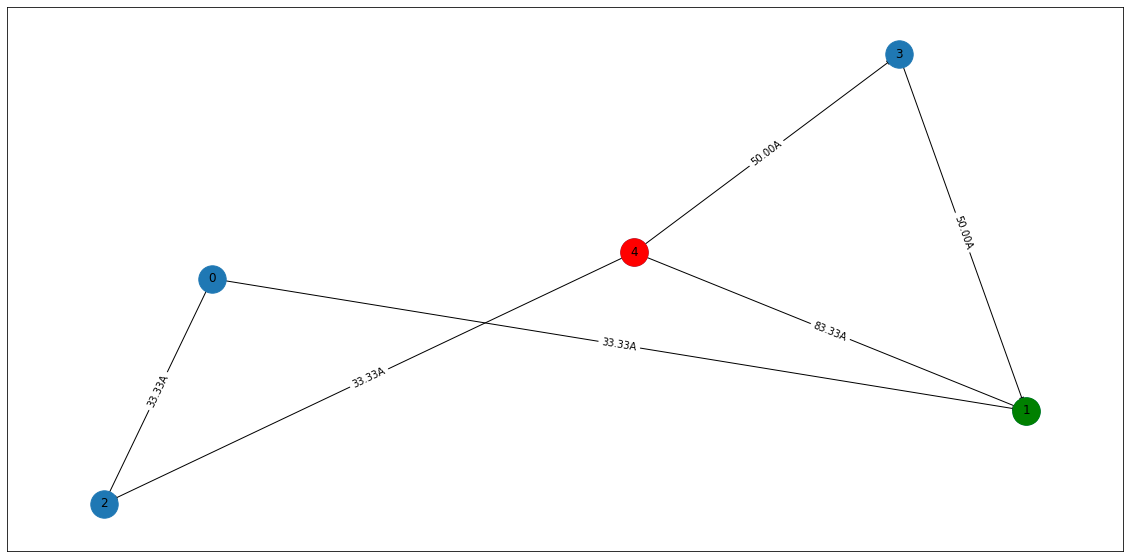

In [205]:
def get_oriented(G, e):
    n1 = e[0]
    n2 = e[1]
    if e in G.edges:
        return True, G.edges[e]
    else:
        return False, G.edges[n2, n1]

    
def edge_cycle(node_cycle):
    return list(zip(node_cycle, node_cycle[1:] + node_cycle[0:1]))    

    
def kirchhofs(G, s, t, E):
    G_undir = G.to_undirected()
    cycles = [edge_cycle(node_cycle)
              for node_cycle in nx.cycle_basis(G_undir)]
    edge_count = G_undir.number_of_edges()
    a = np.empty((0, edge_count)) # coefficient matrix
    b = np.empty((0, 1))

    # II kirchhofs law
    for edges in cycles:
        emf = 0
        if (s, t) in edges:  # determing sign of emf
            emf += E
        elif (t, s) in edges:    
            emf -= E
            
        b = np.append(b, [[emf]], axis=0)

        a_row = np.zeros((1, edge_count))
        for edge in edges:
            was_oriented, oriented_edge = get_oriented(G, edge)
            if was_oriented:
                a_row[0][oriented_edge['edge_no']] += oriented_edge['R']
            else:
                a_row[0][oriented_edge['edge_no']] -= oriented_edge['R']

        a = np.append(a, a_row, axis=0)

    # I kirchhofs law
    for node in G.nodes:
        if a.shape[0] == a.shape[1]:
            break

        a_row = np.zeros((1, a.shape[1]))
        for e in G.in_edges(node):
            edge_no = G.edges[e]['edge_no']
            a_row[0][edge_no] += 1

        for e in G.out_edges(node):
            edge_no = G.edges[e]['edge_no']
            a_row[0][edge_no] += -1

        b = np.append(b, [[0]], axis=0)
        a = np.append(a, a_row, axis=0)

    I =  np.linalg.solve(a, b)
    
    for e in G.edges():
        edge = G.edges[e[0], e[1]]
        edge_no = edge['edge_no']
        edge['I'] = I[edge_no]

        
G, s, t, E = read_directed_from_file('circuit.csv')
make_equation(G, s, t, E)
edge_labels = {e:'%.2fA' %I for e,I in nx.get_edge_attributes(G,'I').items()} 
pos = nx.spring_layout(G)

plt.figure(figsize=(20, 10))

nx.draw_networkx_nodes(G, pos, node_size=750)
nx.draw_networkx_nodes(G, pos, nodelist=[s], node_color='g', node_size=750)
nx.draw_networkx_nodes(G, pos, nodelist=[t], node_color='r', node_size=750)
nx.draw_networkx_labels(G, pos)

nx.draw_networkx_edges(G, pos,)
nx.draw_networkx_edge_labels(G, pos, clip_on=False, edge_labels=edge_labels)

plt.show()

### e) Rozwiązanie za pomocą metody potencjałów węzłowych

In [206]:
def nodal_analysis(G, s, t, E):
    # generating MNA equations
    node_count = len(G.nodes())
    
    a = np.zeros((node_count+1, node_count+1))
    b = np.zeros(node_count+1)
    
    
    b[node_count] = E # no current sources so matrix is [0,0 .... 0, E]
    # row and col node_conunt represents direct connection with voltage source
    # a[node_count][node_count] is 0 bcs no dependent sources were specified
    for i in range(node_count):
        if i == s:
            a[node_count][i] = 1   
            a[i][node_count] = 1
            
        for node in G.adj[i]:
            a[i][i] += 1/(G.adj[i][node]['R']) # a[i][i] consist of sum of adjacent conductance 
            a[i][node] = -1/(G.adj[i][node]['R']) # a[i][j] consist of conductance between i and node
    
    # zeroing t col and row bcs it is my reference node and the solution for it should be 0
    a[t] = 0
    a[:,t] = 0
    a[t][t] = 1

    # solving
    v = np.linalg.solve(a, b)   # solution will be x = [v0, v1, v2, ..., iV] where Vk is voltage in node and
    # iV is current through voltage source
    
    for edge in G.edges():
        n1 = min(edge[0], edge[1]) #if current flows from lower to higher node its positive
        n2 = max(edge[0], edge[1])
        R = G.edges[n1, n2]['R'] 
        G.edges[n1, n2]['I'] = (v[n1] - v[n2]) / R
    
    G.add_edge(s, t, R=None, I=abs(v[node_count]))

### f) Przedstawienie działania programu

Funkcje służące do wizualizacji obwodów oraz sprawdzenia poprawności.

In [215]:
def check_correctness(G, s, t):
    number_of_nodes = G.number_of_nodes()
    for node in range(number_of_nodes):
        in_curr = 0
        out_curr = 0
        for neigh in G.adj[node]:
            I = G.edges[node, neigh]['I']
            
            if node == s and neigh == t:
                in_curr += abs(I)
            elif node == t and neigh == s:
                out_curr += abs(I)
            elif (node-neigh)*I < 0:   # if current flows from lower to higher node its positive (see above)
                out_curr += abs(I)
            else:
                in_curr += abs(I)
                
        if abs(out_curr - in_curr) > 10**-2: # errors when solving for potentials or adding currents
            return False
    
    return True

def print_unsolved_circuit(G):
    edge_labels = {e:'%.2f\u03A9' %R for e,R in nx.get_edge_attributes(G,'R').items()} 
    pos = nx.spring_layout(G)
    
    plt.figure(figsize=(20, 10))
    
    nx.draw_networkx_nodes(G, pos, node_size=750)
    nx.draw_networkx_edges(G, pos,)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edge_labels(G, pos, clip_on=False, edge_labels=edge_labels)
    
    plt.show()

    
def print_solved_circuit(G, s, t, E):
    edge_labels = {e:'%.2fA' %I for e,I in nx.get_edge_attributes(G,'I').items()} 
    pos = nx.spring_layout(G)
    I = G.edges[s, t]['I']
    
    plt.figure(figsize=(20, 10))
    
    nx.draw_networkx_nodes(G, pos, node_size=750)
    nx.draw_networkx_nodes(G, pos, nodelist=[s], node_color='g', node_size=750)# node connected to + is green
    nx.draw_networkx_nodes(G, pos, nodelist=[t], node_color='r', node_size=750)# node connected to - is red
    nx.draw_networkx_labels(G, pos)
    
    nx.draw_networkx_edges(G, pos,)
    nx.draw_networkx_edge_labels(G, pos, clip_on=False, edge_labels=edge_labels)
    nx.draw_networkx_edge_labels(G, pos, clip_on=False, edge_labels={(s, t): f'{E}V, {I:.2f}A'})
    
    plt.show()

#### Losowy spójny graf

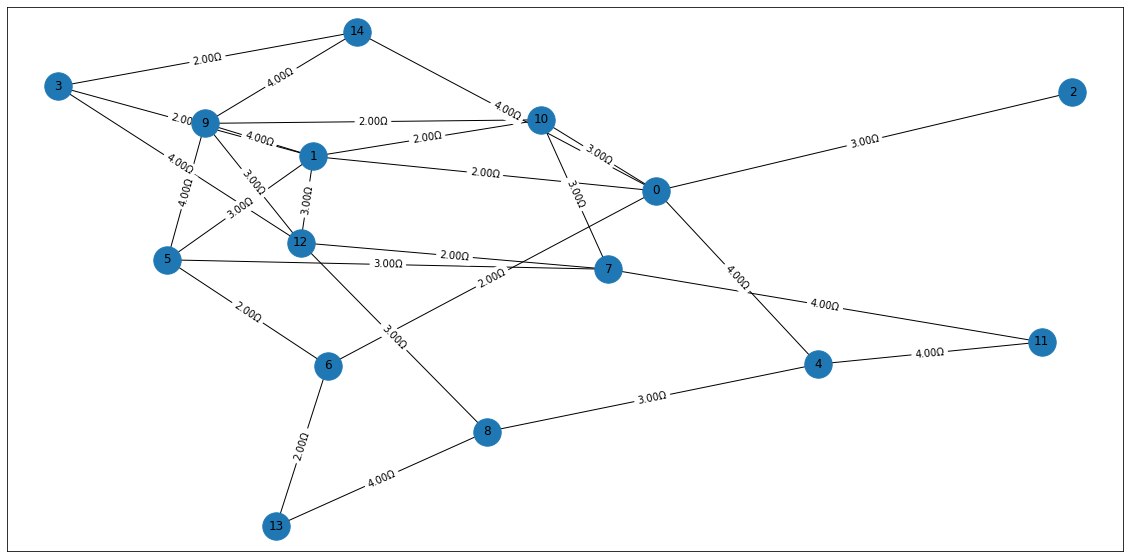

True


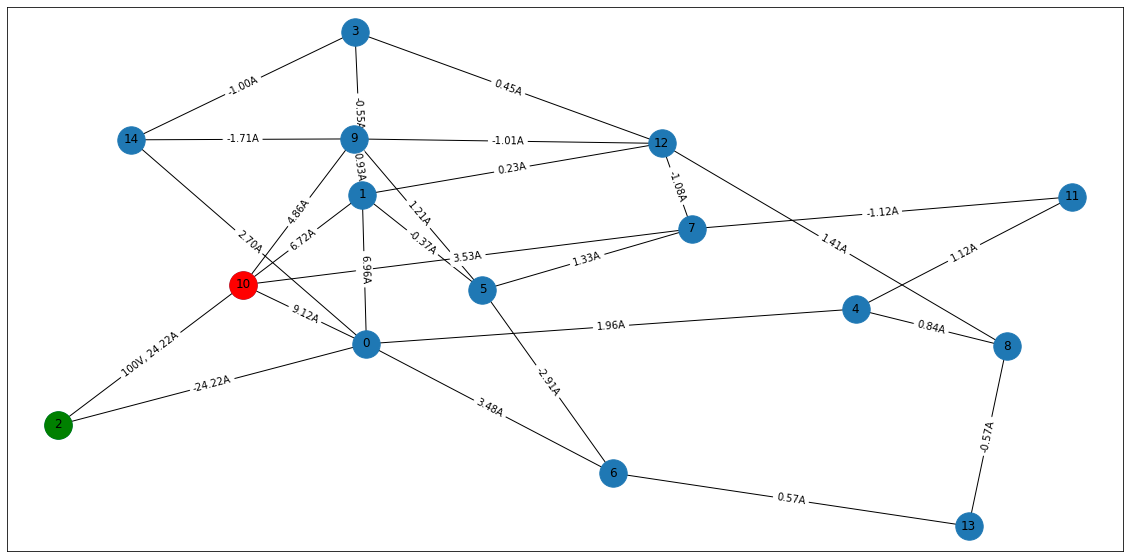

In [216]:
G = nx.erdos_renyi_graph(15, 0.2, seed=123, directed=False)
s = 2
t = 10
E = 100

for i, e in enumerate(G.edges()):
    G.edges[e[0], e[1]]['R'] = (i%3) + 2
    G.edges[e[0], e[1]]['I'] = None

print_unsolved_circuit(G)

nodal_analysis(G, s, t, E)

print(check_correctness(G, s, t))

print_solved_circuit(G, s, t, E)

Poprawność

In [217]:
print(check_correctness(G, s, t))

True


#### Graf 3-regularny (kubiczny)

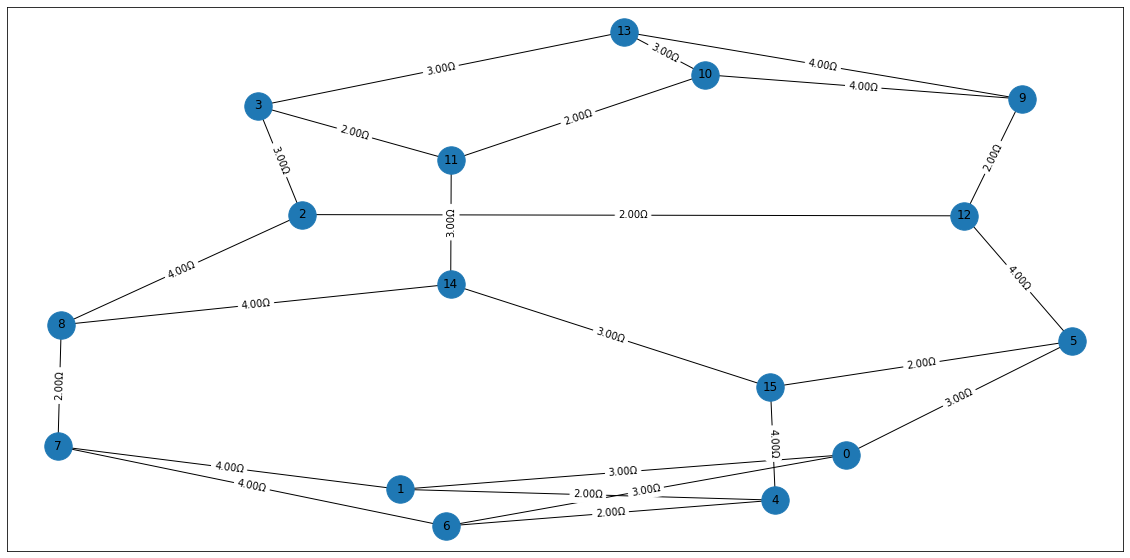

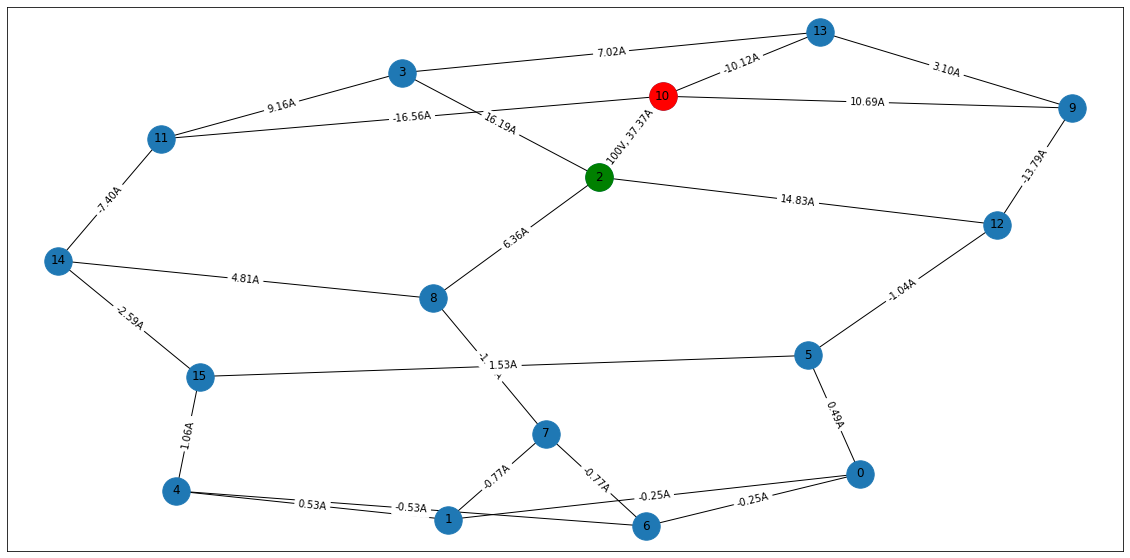

In [218]:
G = nx.random_regular_graph(3, 16, seed=123)
s = 2
t = 10
E = 100

for i, e in enumerate(G.edges()):
    G.edges[e[0], e[1]]['R'] = (i%3) + 2
    G.edges[e[0], e[1]]['I'] = None

print_unsolved_circuit(G)

nodal_analysis(G, s, t, E)

print_solved_circuit(G, s, t, E)

Poprawność

In [219]:
print(check_correctness(G, s, t))

True


#### Graf złożony z dwóch losowych grafów połączonych mostkiem

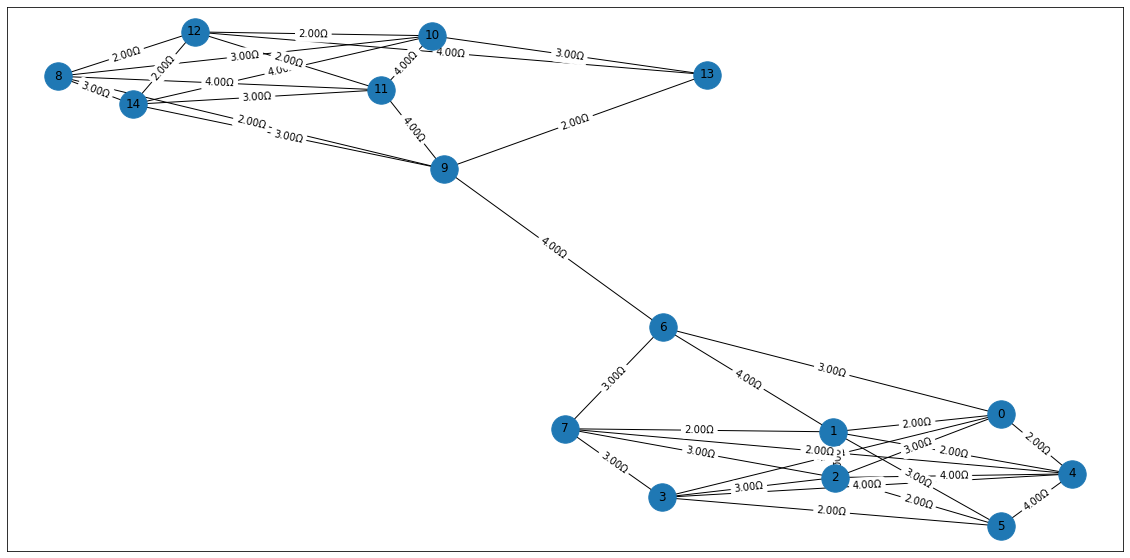

True


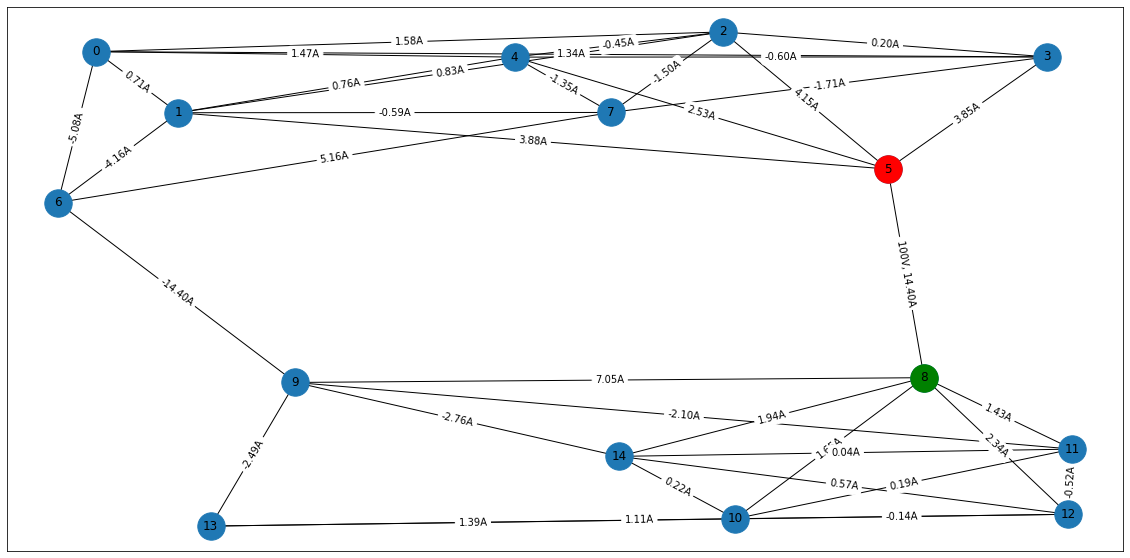

In [220]:
G1 = nx.erdos_renyi_graph(8, 0.5, seed=123, directed=False)
G2 = nx.erdos_renyi_graph(7, 0.5, seed=123, directed=False)
s = 8
t = 5
E = 100

G = nx.disjoint_union(G1,G2)
G.add_edge(6, 9, R=2, I=None)

for i, e in enumerate(G.edges()):
    G.edges[e[0], e[1]]['R'] = (i%3) + 2
    G.edges[e[0], e[1]]['I'] = None

print_unsolved_circuit(G)

nodal_analysis(G, s, t, E)

print(check_correctness(G, s, t))

print_solved_circuit(G, s, t, E)

Poprawność

In [221]:
print(check_correctness(G, s, t))

True


#### Graf siatka 2D

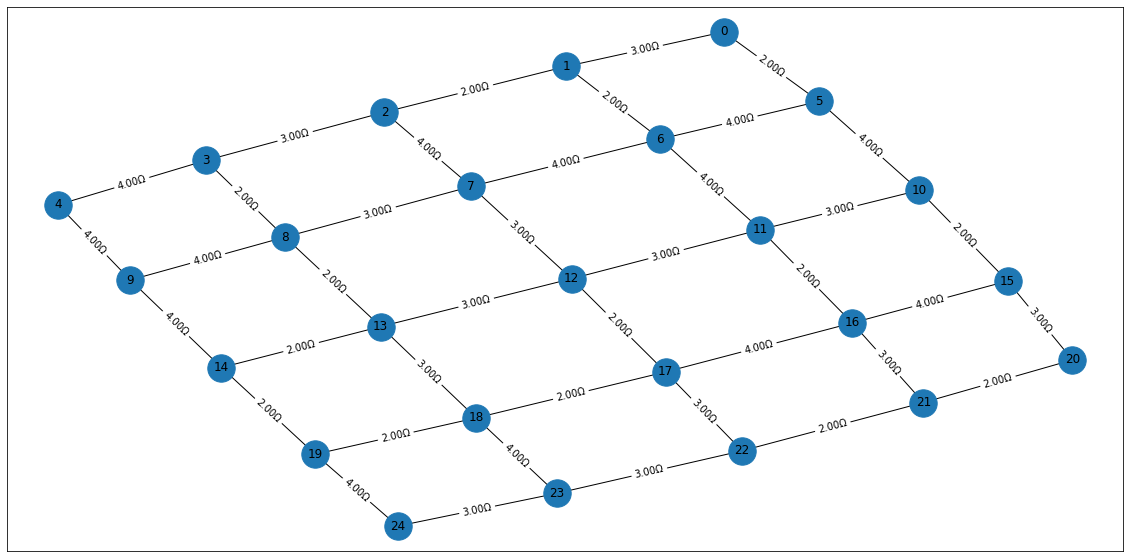

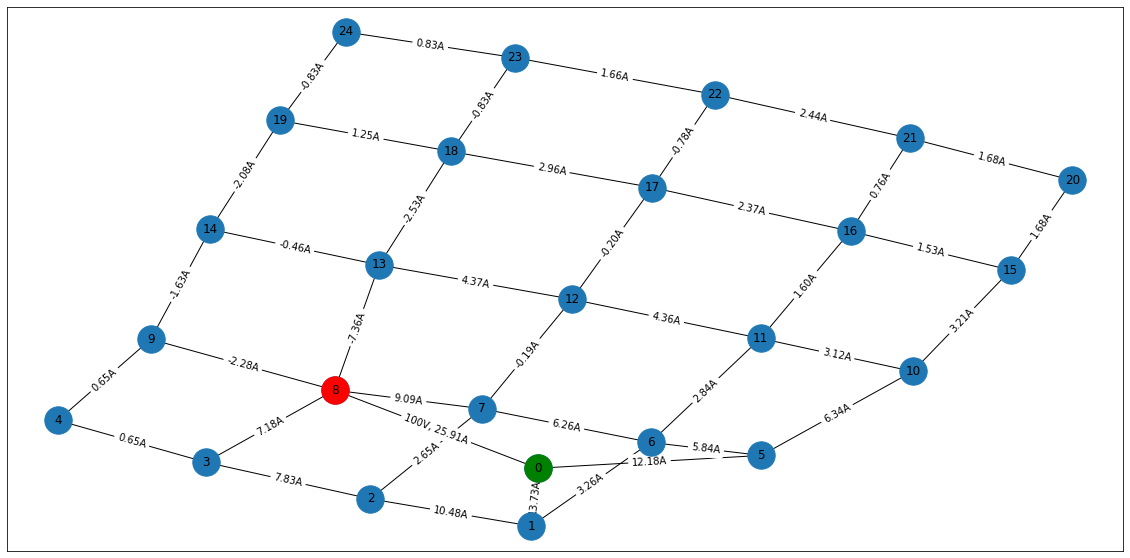

In [226]:
G = nx.grid_2d_graph(5, 5,periodic=False)

new_names = {}
counter = 0;
for i in range(5):
    for j in range(5):
        new_names[(i, j)] = counter
        counter += 1
        
nx.relabel_nodes(G, new_names, copy=False)

s = 0
t = 8
E = 100

for i, e in enumerate(G.edges()):
    G.edges[e[0], e[1]]['R'] = (i%3) + 2
    G.edges[e[0], e[1]]['I'] = None

print_unsolved_circuit(G)

nodal_analysis(G, s, t, E)

print_solved_circuit(G, s, t, E)

Poprawność

In [227]:
print(check_correctness(G, s, t))

True


### Wnioski


W gruncie rzeczy każda metoda analizy obwodów elektrycznych korzysta z praw Kirchhofa, ale organizuje ich użycie w odpowiedni sposób. Metoda potencjałów węzłowych umożliwia rozwiązanie każdego układu w bardzo schematyczny sposób i jest moim zdaniem prostsza w działaniu i zrozumieniu od aplikowania krok po kroku praw kirchhofa do obwodu. Ponadto jest rozszerzalna i umożliwia proste dodanie kolejnych źródeł napięciowych oraz prądowych (zmiana odpowiednich pól w macierzy) a nawet bardziej skomplikowanych elementów. 